<a href="https://colab.research.google.com/github/yashx007/ML/blob/main/A6_Clustering_using_Elbow_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files  # Only for Colab

# Upload file (for Colab)
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Display the first few rows
df.head()


Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Selecting 'Annual Income (k$)' and 'Spending Score (1-100)' for clustering
X = df.iloc[:, [3, 4]].values


In [ ]:
# Elbow Method & Silhouette Score for finding optimal k
wcss = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)


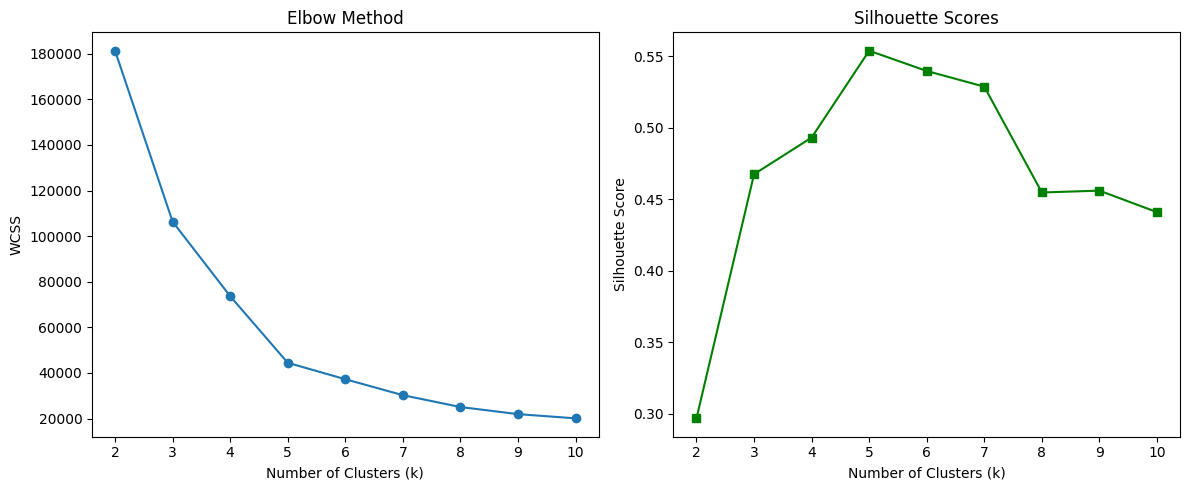

In [ ]:
plt.figure(figsize=(12, 5))

# Elbow Method Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='s', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [ ]:
print("Elbow Score (WCSS Values):")
for k, score in zip(k_values, wcss):
    print(f"k={k}, WCSS={score:.2f}")

print("\nSilhouette Scores:")
for k, score in zip(k_values, silhouette_scores):
    print(f"k={k}, Silhouette Score={score:.4f}")


Elbow Score (WCSS Values):
k=2, WCSS=181363.60
k=3, WCSS=106348.37
k=4, WCSS=73679.79
k=5, WCSS=44448.46
k=6, WCSS=37233.81
k=7, WCSS=30241.34
k=8, WCSS=25036.42
k=9, WCSS=21916.79
k=10, WCSS=20072.07

Silhouette Scores:
k=2, Silhouette Score=0.2969
k=3, Silhouette Score=0.4676
k=4, Silhouette Score=0.4932
k=5, Silhouette Score=0.5539
k=6, Silhouette Score=0.5398
k=7, Silhouette Score=0.5288
k=8, Silhouette Score=0.4548
k=9, Silhouette Score=0.4561
k=10, Silhouette Score=0.4411


In [ ]:
# Assuming the optimal number of clusters is 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)


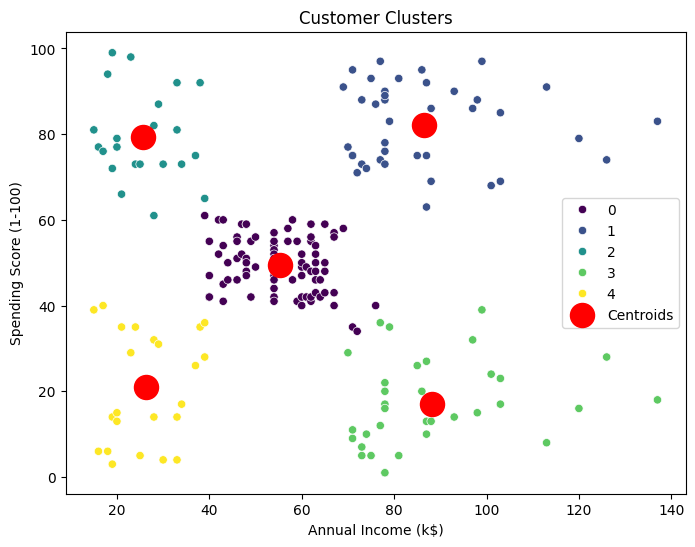

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
